<a href="https://colab.research.google.com/github/cegilsimancas/SDG_LAB2/blob/main/Lab2_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
def objective(alpha):
    global target_kernel_matrix
    return 1/2 * target_kernel_matrix.dot(alpha).dot(alpha) - np.sum(alpha)
    
def initialize(N):
    return np.zeros(N)

def alpha_limits(C, N):
    return [(0,C) for b in range(N)]

def zerofun(alpha):
    global targets
    return np.dot(alpha, targets)
    
def constraints(type='eq', fun=zerofun):
    return {'type':type, 'fun':fun}

def kernel(kernel_type, x, y, p=0, sigma=0):
    if kernel_type == "linear":
        return np.dot(x,y)
    if kernel_type == "polynomial":
        return (np.dot(x,y)+1)**p
    if kernel_type == "radial":
        return np.exp(-np.linalg.norm(x-y)**2/2/sigma**2)

def threshold_filter(alpha, targets, inputs, threshold=10e-5):
    filtered_alpha = np.array([a for a in alpha if a >= threshold])
    filtered_targets = np.array([targets[i] for i in range(len(alpha)) if alpha[i] >= threshold])
    filtered_inputs = np.array([inputs[i] for i in range(len(alpha)) if alpha[i] >= threshold])
    return filtered_alpha, filtered_inputs, filtered_targets

def calc_b(alpha, sv_target_kernel_vector, sv_target):
    return np.sum(alpha*sv_target_kernel_vector) - sv_target

def indicator(x, y):
    global filtered_alpha, filtered_inputs, filtered_targets, b
    global kernel_type, p_value, sigma_value
    kernel_vector = np.array([kernel(kernel_type, np.array([x,y]), i, p_value, sigma_value) for i in filtered_inputs])
    return np.sum(filtered_alpha * filtered_targets * kernel_vector) - b

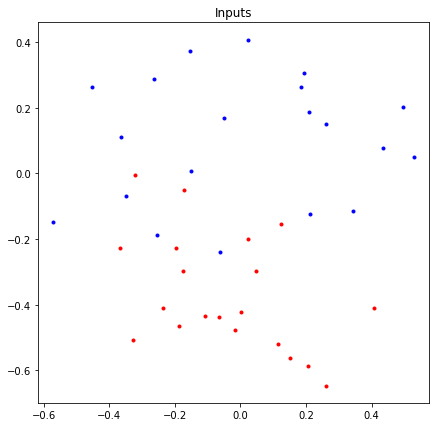

In [29]:
figsize = [7,7]
np.random.seed(100)
classA = np.concatenate(
(np.random.randn(10, 2) * 0.2 + [0.3, .1],
np.random.randn(10, 2) * 0.2 + [-0.3, .1]))

classB = np.random.randn(20, 2) * 0.2 + [0.0, -.3]

inputs = np.concatenate((classA, classB))

targets = np.concatenate( #Definition of each target: 1 class A, -1 Class B
(np.ones(classA.shape[0]),
-np.ones(classB.shape[0])))

N = inputs.shape[0] # Number of rows (samples)
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute,:]
targets = targets[permute]


plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.') #(x,y, 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
#xgrid = np.linspace(-5, 5)
#ygrid = np.linspace(-4, 4)
#grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
#plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red','black','blue'),linewidths=(1 , 3 , 1))
plt.axis('equal') # Force same scale on both axes
plt.title("Inputs", fontdict=None, loc='center')
plt.rcParams['figure.figsize'] = figsize
plt.savefig('svmplot.png') # Save a copy in a file
plt.show() # Show the plot on the screen



# Radial Kernel

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1]
0.6489003593485743
0.9017114164548008
-0.7265755062179693
-1.0722387361986296
0.8536907794556154
-0.9699472771608165
-0.7193287412294158
-0.8499822329612914
0.7709497058661996
0.5649247709118023
-0.8267996448444263
-0.9035291649976821
-0.8334196468973047
0.6079145621236873
1.025663126381073
-0.6820738066639739
-0.685443507662233
-0.8602298917445508
0.9839726017513883
-0.7668884548877466
-0.9690486753956339
0.7548163744451121
-0.8039247725091621
0.9306449014993948
0.6521130319720552
-0.9354058414462345
0.829037323744872
0.8942695340693472
0.6453907061778785
-0.8238080044197129
0.7383569640692258
-0.8889565230975114
-1.1554758682418687
0.6784111543372586
0.5304685404851919
0.5252521156278573
0.8082919473821413
0.5671687555391511
-0.8619619312670237
-0.8501425203656968


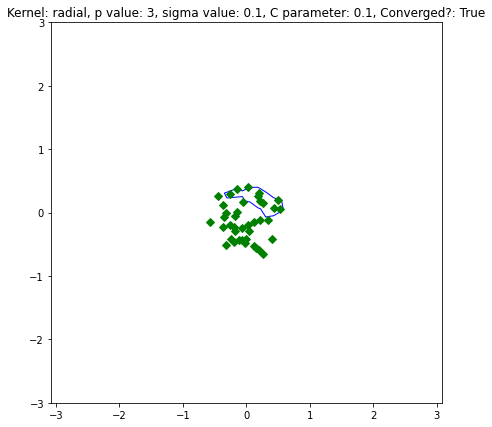

In [54]:
kernel_type = 'radial'
p_value = 3
sigma_value = 0.1
C = 0.1

start = initialize(N)
B = alpha_limits(C, N)
XC = {'type':'eq', 'fun':zerofun}

target_kernel_matrix = np.zeros((N,N)) 
for i in range(N):
    for j in range(N):
        target_kernel_matrix[j,i] = targets[i] * targets[j] * kernel(
            kernel_type, inputs[i] , inputs[j], p=p_value, sigma=sigma_value)

ret = minimize(objective, start, bounds = B, constraints = XC) #Create the alpha vector
alpha = ret['x']
result = ret['success'] #Success or not

filtered_alpha, filtered_inputs, filtered_targets = threshold_filter(alpha, targets, inputs) #Filter based on threshold
print(filtered_alpha)
for i in range(len(filtered_alpha)):
  sv = filtered_inputs[i]
  sv_target = filtered_targets[i]
  #print(sv,sv_target)
  sv_target_kernel_vector = np.array([targets[i]*kernel(kernel_type, sv, inputs[i], p_value, sigma_value) for i in range(len(inputs))])
  b = calc_b(alpha,sv_target_kernel_vector, sv_target)
  print(b)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
plt.plot([f[0] for f in filtered_inputs], [f[1] for f in filtered_inputs], 'g.', marker="D")
xgrid = np.linspace(-3, 3)
ygrid = np.linspace(-3, 3)
grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red','black','blue'),linewidths=(1 , 3 , 1))
plt.axis('equal') # Force same scale on both axes
plt.title("Kernel: " + str(kernel_type) + ", p value: " + str(p_value) 
          + ", sigma value: " + str(sigma_value) + ", C parameter: " + str(C) 
          + ", Converged?: " + str(result), fontdict=None, loc='center')
plt.rcParams['figure.figsize'] = figsize
plt.savefig(kernel_type+'_C_'+str(C)+'_p_'+str(p_value)+'_sigma_'+str(sigma_value)+'.png') # Save a copy in a file
plt.show() # Show the plot on the screen



# Linear Kernel

False
[2.19516674e+00 4.75647665e+04 1.33016686e-01 5.73707476e+04
 2.98637717e+04 3.67462941e+04 4.94511818e-03 1.10324577e-03
 1.08054864e+01 1.70651406e+01 6.77939990e-03 5.36067229e+04
 1.74866114e-03 1.56695462e-03 6.88921249e+04 2.46719843e+00
 1.38309317e-01 6.38595075e-02 6.26514391e+04 3.98715104e+02
 2.01878152e+04 2.03228377e+04 4.52342070e+03 2.81278498e+04
 1.61788818e+01 3.98897113e+04 3.80611631e+04 4.20927352e+03
 1.44788661e-03 6.92534124e+00 1.78676075e+04 4.20808428e+03
 6.41237915e+04 1.05318511e+00 3.32153564e+00 1.11528640e+01
 1.03849471e-01 7.03005782e-01 7.39654717e+00 3.65509734e+04]
0.1453463505131367
0.6411984638455124
-0.7185462467605248
-1.3653559636986756
0.5358995719761879
-1.0834345831790415
-0.36530547461734386
-0.108079832398289
-0.4693026630629902
-0.04628599709212722
-0.318723022274753
-1.2124856012487726
-0.15321484134710772
0.013721777891987585
1.048785321880132
-0.4567846038607968
-0.6291784595614445
-0.6204383318315649
0.9229329008139757
-0.9093

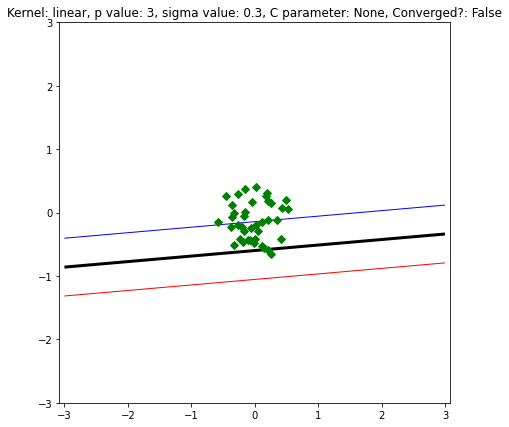

In [55]:
kernel_type = 'linear'
p_value = 3
sigma_value = .3
C = None

start = initialize(N)
B = alpha_limits(C, N)
XC = {'type':'eq', 'fun':zerofun}

target_kernel_matrix = np.zeros((N,N)) 
for i in range(N):
    for j in range(N):
        target_kernel_matrix[j,i] = targets[i] * targets[j] * kernel(
            kernel_type, inputs[i] , inputs[j], p=p_value, sigma=sigma_value)
        
ret = minimize(objective, start, bounds = B, constraints = XC) #Create the alpha vector
alpha = ret['x']
result = ret['success'] #Success or not
print(result)

filtered_alpha, filtered_inputs, filtered_targets = threshold_filter(alpha, targets, inputs) #Filter based on threshold
print(filtered_alpha)
for i in range(len(filtered_alpha)):
  sv = filtered_inputs[i]
  sv_target = filtered_targets[i]
  #print(sv,sv_target)
  sv_target_kernel_vector = np.array([targets[i]*kernel(kernel_type, sv, inputs[i], p_value, sigma_value) for i in range(len(inputs))])
  b = calc_b(alpha,sv_target_kernel_vector, sv_target)
  print(b)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
plt.plot([f[0] for f in filtered_inputs], [f[1] for f in filtered_inputs], 'g.', marker="D")
xgrid = np.linspace(-3, 3)
ygrid = np.linspace(-3, 3)
grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red','black','blue'),linewidths=(1 , 3 , 1))
plt.axis('equal') # Force same scale on both axes
plt.title("Kernel: " + str(kernel_type) + ", p value: " + str(p_value) 
          + ", sigma value: " + str(sigma_value) + ", C parameter: " + str(C) 
          + ", Converged?: " + str(result), fontdict=None, loc='center')
plt.rcParams['figure.figsize'] = figsize
plt.savefig(kernel_type+'_C_'+str(C)+'_p_'+str(p_value)+'_sigma_'+str(sigma_value)+'.png') # Save a copy in a file
plt.show() # Show the plot on the screen

# Polynomial Kernel

True
[0.09457512 0.1        0.1        0.1        0.1        0.1
 0.08315725 0.1        0.0575801  0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.07388264 0.1
 0.08392579 0.1        0.05620539 0.1       ]
-0.55227188579501
0.6682036613902332
-0.5578110257949944
-1.471083305635959
0.3551738178762347
-0.9850099138032058
-0.5520740299823743
1.130982172002791
-0.5523880455690968
-0.713065095366187
0.8944495381837603
-0.9810726270874937
0.11498799515696945
0.498481302221476
-1.2007854672778908
0.4843076883616543
-0.5521152474600881
0.06752373012961876
-0.55208724846361
-1.6791301209892762
-0.551918479109029
-1.0919807450948815


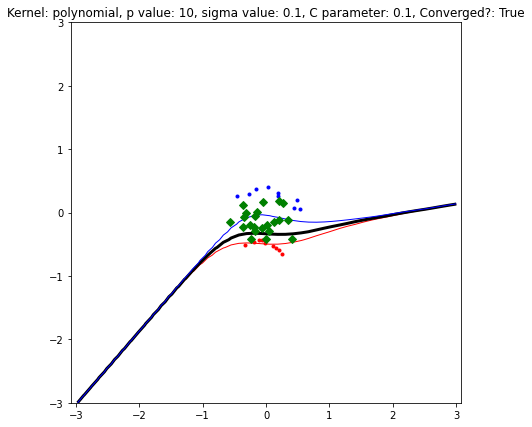

In [52]:
kernel_type = 'polynomial'
p_value = 10
sigma_value = 0.1
C = 0.1

start = initialize(N)
B = alpha_limits(C, N)
XC = {'type':'eq', 'fun':zerofun}

target_kernel_matrix = np.zeros((N,N)) 
for i in range(N):
    for j in range(N):
        target_kernel_matrix[j,i] = targets[i] * targets[j] * kernel(
            kernel_type, inputs[i] , inputs[j], p=p_value, sigma=sigma_value)
        
ret = minimize(objective, start, bounds = B, constraints = XC) #Create the alpha vector
alpha = ret['x']
result = ret['success'] #Success or not
print(result)

filtered_alpha, filtered_inputs, filtered_targets = threshold_filter(alpha, targets, inputs) #Filter based on threshold
print(filtered_alpha)
for i in range(len(filtered_alpha)):
  sv = filtered_inputs[i]
  sv_target = filtered_targets[i]
  #print(sv,sv_target)
  sv_target_kernel_vector = np.array([targets[i]*kernel(kernel_type, sv, inputs[i], p_value, sigma_value) for i in range(len(inputs))])
  b = calc_b(alpha,sv_target_kernel_vector, sv_target)
  print(b)

plt.plot([p[0] for p in classA], [p[1] for p in classA], 'b.')
plt.plot([p[0] for p in classB], [p[1] for p in classB], 'r.')
plt.plot([f[0] for f in filtered_inputs], [f[1] for f in filtered_inputs], 'g.', marker="D")
xgrid = np.linspace(-3, 3)
ygrid = np.linspace(-3, 3)
grid = np.array([[indicator(x, y) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red','black','blue'),linewidths=(1 , 3 , 1))
plt.axis('equal') # Force same scale on both axes
plt.title("Kernel: " + str(kernel_type) + ", p value: " + str(p_value) 
          + ", sigma value: " + str(sigma_value) + ", C parameter: " + str(C) 
          + ", Converged?: " + str(result), fontdict=None, loc='center')
plt.rcParams['figure.figsize'] = figsize
plt.savefig(kernel_type+'_C_'+str(C)+'_p_'+str(p_value)+'_sigma_'+str(sigma_value)+'.png') # Save a copy in a file
plt.show() # Show the plot on the screen
